In [1]:
import xarray as xr
import xroms
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import cartopy
import numpy as np
import cmocean.cm as cmo
import cf_xarray
import xcmocean
from glob import glob

import os
import sys
scriptpath = "../RePlots/"
sys.path.append(os.path.abspath(scriptpath))
from plotting import *

In [2]:
# where on Ada cartopy can access data for plotting on maps like coastline data
# on a personal computer this just happens in the background and is downloaded 
# in the background and found in a consistent location, but on Ada the nodes are not
# connected to the internet.
#cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'

# Read in model output

`glob` finds file names follow patterns. In the following, the files that match the set pattern are returned, where the "\*" is a wildcard. In this case, all files from 2017 are returned.

The files are then loaded into Python using `xroms` which wraps the basic functionality in `xarray`. The result is an xarray Dataset of the model output. Chunks are used to break up the model output for use by `dask`. In this case, only the time dimension is being chunked, in order to avoid needing to rechunk later.

In [3]:
files = glob('/datasets/GOM_9k_nature_copernicus/cmpr_GOM_9k_nature_copernicus.ocn.hi.2010-02*.nc')
files.sort()
ds = xroms.open_mfnetcdf(files, chunks={'ocean_time': 30})
ds

<xarray.Dataset>
Dimensions:      (boundary: 4, eta_rho: 489, eta_v: 488, ocean_time: 224, s_rho: 50, s_w: 51, tracer: 2, xi_rho: 655, xi_u: 654)
Coordinates:
  * s_rho        (s_rho) float64 -0.99 -0.97 -0.95 -0.93 ... -0.05 -0.03 -0.01
  * s_w          (s_w) float64 -1.0 -0.98 -0.96 -0.94 ... -0.06 -0.04 -0.02 0.0
  * ocean_time   (ocean_time) datetime64[ns] 2010-02-01T03:00:00 ... 2010-03-01
    lon_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
    lat_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
    lon_u        (eta_rho, xi_u) float64 dask.array<chunksize=(489, 654), meta=np.ndarray>
    lat_u        (eta_rho, xi_u) float64 dask.array<chunksize=(489, 654), meta=np.ndarray>
    lon_v        (eta_v, xi_rho) float64 dask.array<chunksize=(488, 655), meta=np.ndarray>
    lat_v        (eta_v, xi_rho) float64 dask.array<chunksize=(488, 655), meta=np.ndarray>
    lon_psi      (eta_v, xi_u) float64 dask.array<chunksize=(488, 654), meta=np.ndarray>
    lat_psi      (eta_v, xi_u) float64 dask.array<chunksize=(488, 654), meta=np.ndarray>
  * xi_rho       (xi_rho) int64 0 1 2 3 4 5 6 7 ... 648 649 650 651 652 653 654
  * xi_u         (xi_u) int64 0 1 2 3 4 5 6 7 ... 647 648 649 650 651 652 653
  * eta_rho      (eta_rho) int64 0 1 2 3 4 5 6 7 ... 482 483 484 485 486 487 488
  * eta_v        (eta_v) int64 0 1 2 3 4 5 6 7 ... 481 482 483 484 485 486 487
    z_w          (ocean_time, s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(8, 51, 489, 655), meta=np.ndarray>
    z_w_u        (ocean_time, s_w, eta_rho, xi_u) float64 dask.array<chunksize=(8, 51, 489, 654), meta=np.ndarray>
    z_w_v        (ocean_time, s_w, eta_v, xi_rho) float64 dask.array<chunksize=(8, 51, 488, 655), meta=np.ndarray>
    z_w_psi      (ocean_time, s_w, eta_v, xi_u) float64 dask.array<chunksize=(8, 51, 488, 654), meta=np.ndarray>
    z_rho        (ocean_time, s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(8, 50, 489, 655), meta=np.ndarray>
    z_rho_u      (ocean_time, s_rho, eta_rho, xi_u) float64 dask.array<chunksize=(8, 50, 489, 654), meta=np.ndarray>
    z_rho_v      (ocean_time, s_rho, eta_v, xi_rho) float64 dask.array<chunksize=(8, 50, 488, 655), meta=np.ndarray>
    z_rho_psi    (ocean_time, s_rho, eta_v, xi_u) float64 dask.array<chunksize=(8, 50, 488, 654), meta=np.ndarray>
    z_rho0       (s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(50, 489, 655), meta=np.ndarray>
    z_rho_u0     (s_rho, eta_rho, xi_u) float64 dask.array<chunksize=(50, 489, 654), meta=np.ndarray>
    z_rho_v0     (s_rho, eta_v, xi_rho) float64 dask.array<chunksize=(50, 488, 655), meta=np.ndarray>
    z_rho_psi0   (s_rho, eta_v, xi_u) float64 dask.array<chunksize=(50, 488, 654), meta=np.ndarray>
    z_w0         (s_w, eta_rho, xi_rho) float64 dask.array<chunksize=(51, 489, 655), meta=np.ndarray>
    z_w_u0       (s_w, eta_rho, xi_u) float64 dask.array<chunksize=(51, 489, 654), meta=np.ndarray>
    z_w_v0       (s_w, eta_v, xi_rho) float64 dask.array<chunksize=(51, 488, 655), meta=np.ndarray>
    z_w_psi0     (s_w, eta_v, xi_u) float64 dask.array<chunksize=(51, 488, 654), meta=np.ndarray>
Dimensions without coordinates: boundary, tracer
Data variables:
    ntimes       int32 ...
    ndtfast      int32 ...
    dt           float64 ...
    dtfast       float64 ...
    dstart       datetime64[ns] ...
    nHIS         int32 ...
    ndefHIS      int32 ...
    nRST         int32 ...
    Falpha       float64 ...
    Fbeta        float64 ...
    Fgamma       float64 ...
    nl_tnu2      (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    nl_visc2     float64 ...
    Akt_bak      (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Akv_bak      float64 ...
    rdrg         float64 ...
    rdrg2        float64 ...
    Zob          float64 ...
    Zos          float64 ...
    Znudg        float64 ...
    M2nudg       float64 ...
    M3nudg       float64 ...
    Tnudg        (trac

In [3]:
#set up plotting projections stuff for maps
pc = cartopy.crs.PlateCarree()  # to match lon/lat
proj = cartopy.crs.LambertConformal(central_longitude=-90)  # projection for plot

# Calculations to plot

Here we run several calculations. 

## SST anomaly longitude slice

### Select surface temperature

Select the surface temperature only. The `drop` keyword argument drops the coordinate, `s_rho`, in the "z" direction, rather than bringing it along, which helps `cf-xarray` to properly track the coordinates and dimensions present in the array. You can learn more about the `drop` keyword by reading the relevant by running the command

    ds.isel?
    
Here I used the `cf-xarray` accessor for convenience to refer to the Z dimension rather than specifying the "s_rho" dimension. I could avoid using the `cf-xarray` accessor and get the same result with

    ds.temp.isel(s_rho=-1, drop=True)
    
Note that the "-1" is used in this index selection approach to pull out the final index in the s_rho dimension, which is how to access the surface. You can learn more about subselecting by time and space by both index (`isel`) and keyword (`sel`) in [xarray docs](http://xarray.pydata.org/en/stable/indexing.html) or in xroms [select_data notebook](https://github.com/kthyng/xroms/blob/master/examples/select_data.ipynb).

In [5]:
# Select the surface 
sst = ds.temp.cf.isel(Z=-1, drop=True)

### Calculate slice of surface temperature at -86 longitude

`isoslice` in `xroms` wraps the `transform` function in `xgcm` to calculate an isosurface of an array at a particular value. So, the following calculates the surface temperature (`sst`) in the `X` (same as "xi" same as "longitude") direction projected to the `lon_rho` array at the value of -86 longitude:

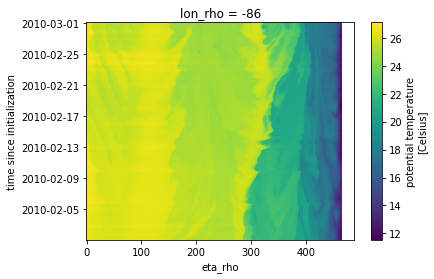

In [6]:
sst_slice = sst.xroms.isoslice(-86, ds.temp.lon_rho, axis='X')
sst_slice.plot()

### Calculate the mean SST over time

Calculate the mean of SST over the dataset. The `skipna` keyword argument suppresses a warning for locations that has all nan's, such as masked cells in the model.

In [22]:
sst_slice_mean = sst_slice.cf.mean('T', skipna=False)

### Calculate the anomaly by day of year

Here we:
* Calculate the SST anomaly at this longitude
* Group the anomaly values by the day of the year across the available years. In this case, there is only one year included but the calculation is setup the same. If not using `cf-xarray`, the second line would be: `anom.groupby("ocean_time.dayofyear").mean(skipna=False)`. After the `groupby` part of the line, an aggregation function needs to be used for the grouping; in this case we choose to take the mean over the values grouped by the day of the year (other options would be e.g. max, min, etc).
* `hov.cf.guess_coord_axis()` is used to add back in some attributes to help `cf-xarray` work better.

In [29]:
anom = (sst_slice - sst_slice_mean)
hov = anom.cf.groupby("T.dayofyear").mean(skipna=False)
hov = hov.cf.guess_coord_axis()

### Run computation

Up to this point, all of the calculations have been lazily evaluated.

In [34]:
hov = hov.compute()

## Eddy kinetic energy

This calculation is done in `xroms`. The details are available by running `xroms.EKE?` in a cell.

* Use calculation for EKE built into xroms using the xroms accessor (`ds.xroms.EKE`)
* Calculate the mean of EKE over time (`.cf.mean('T', skipna=False)`)
* Run the computation and save the numbers (`.compute()`)

In [35]:
EKE = ds.xroms.EKE.cf.mean('T', skipna=False)
EKE = EKE.compute()

## Mean surface temperature

* Select the surface temperature (`ds.temp.cf.isel(Z=-1)`)
* Take the mean over time (`.cf.mean('T', skipna=False)`)
* Run computation (`.compute()`)

In [18]:
SST = ds.temp.cf.isel(Z=-1).cf.mean('T', skipna=False)
SST = SST.compute()

# Plots

Much of the code below is from either `matplotlib`, the Python plotting package, or `matplotlib` wrapped by `xarray`. The `rp.` functions are convenience functions I wrote in `RePlots` to make many of the plotting details easier/better.

NameError: name 'hov' is not defined

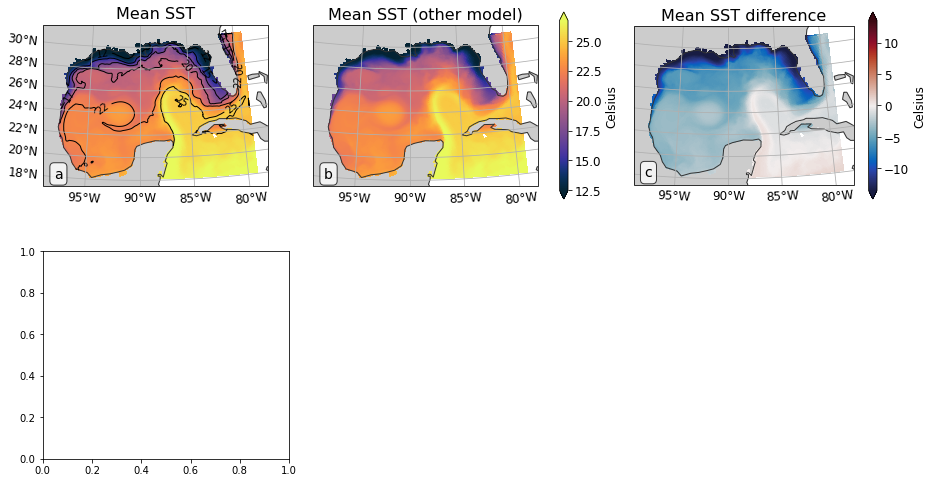

In [19]:
# set up figure with size
fig = plt.figure(figsize=(15,13))
# we will have 3 rows of plots and 3 columns of plots
nrows, ncols = 3, 3

titlesize = 16
ticksize = 12

## Mean SSTs ##
# set up subplot in location 1 (top left) with a projection since it is a map
ax1 = plt.subplot(nrows, ncols, 1, projection=proj)
# call the setup_map convenience function to get the basics into the map
# this returns a dictionary of items to input to your subsequent plotting calls
pargs, oargs = setup_map(ax=ax1, title='Mean SST', titlesize=titlesize, xticks=np.arange(-95,-75,5),
                            ticklabelsize=ticksize, subargs={'label': 'a', 'loc': 'bottom left'})
# input plotting dictionary `pargs` into pcolormesh plot call with syntanx `**pargs` to unpack all items
# a basic xarray plot could happen with `SST.plot()` or equivalently in this case `SST.plot.pcolormesh()`
# also here using xcmocean accessor to choose colormap based on properties of the DataArray being plotted.
# also using cf-xarray accessor to be able to generally refer to longitude and latitude without referring to 
# specific grid.
SST.cmo.cfpcolormesh(**pargs)
# also plot contour lines on top. This is matplotlib wrapped by xarray with cf-xarray.
cs = SST.cf.plot.contour(**pargs, colors='k', linewidths=1)
# also label contour lines. This is matplotlib directly.
ax1.clabel(cs, inline=1, fontsize=10, fmt='%d')  # add labels to contours


ax2 = plt.subplot(nrows, ncols, 2, projection=proj)
pargs, oargs = setup_map(ax=ax2, left_labels=False, title='Mean SST (other model)', titlesize=titlesize, 
                            ticklabelsize=ticksize, xticks=np.arange(-95,-75,5), 
                            subargs={'label': 'b', 'loc': 'bottom left'})
im = SST.cmo.cfplot(**pargs)
# Set up a colorbar with this convenience wrapper. Have it take space from both axes so far with `ax=[ax1,ax1]`.
cbar(im, ax=[ax1,ax2], label='Celsius', labelsize='large', ticksize='large', extend='both', shrink=0.9)


ax3 = plt.subplot(nrows, ncols, 3, projection=proj)
pargs, oargs = setup_map(ax=ax3, left_labels=False, title='Mean SST difference', titlesize=titlesize, 
                            ticklabelsize=ticksize, xticks=np.arange(-95,-75,5), 
                            subargs={'label': 'c', 'loc': 'bottom left'})  # making up new variable to show difference
im = (SST-26).cmo.cfplot(**pargs)
cbar(im, ax=ax3, label='Celsius', labelsize='large', ticksize='large', extend='both', shrink=0.9, pad=0.06)


## Hovmoller ##
ax4 = plt.subplot(nrows, ncols, 4)
# setup plot but not a map. This is setup to nicely format based on plotting longitude, latitude, or time.
pargs, _ = setup_hov(hov, ax4, xaxis='time', yaxis='lat', title='SST', titlesize=titlesize, 
                        ticklabelsize=ticksize, 
                        subargs={'label': 'd', 'loc': 'bottom left'})
hov.cmo.cfplot(**pargs)
cs = hov.squeeze().cmo.cfcontour(**pargs, levels=5, colors='k')
ax4.clabel(cs, inline=1, fontsize=10, fmt='%d')


ax5 = plt.subplot(nrows, ncols, 5)
pargs, _ = setup_hov(hov, ax5, xaxis='time', yaxis='lat', xticklabels=True, yticklabels=False,
                  title='SST', titlesize=titlesize, ticklabelsize=ticksize, 
                  subargs={'label': 'e', 'loc': 'bottom left'})
im = hov.cmo.cfplot(**pargs)
cbar(im, ax=[ax4,ax5], labelsize=16, label='Celsius', ticksize='large')


## EKE ##
ax7 = plt.subplot(nrows, ncols, 7, projection=proj)
pargs, oargs = setup_map(ax=ax7, title='Eddy kinetic energy', titlesize=titlesize, xticks=np.arange(-95,-75,5),
                            ticklabelsize=ticksize, subargs={'label': 'f', 'loc': 'bottom left'})
EKE.cmo.cfplot(**pargs)
cs = EKE.cf.plot.contour(**pargs, colors='k')


ax8 = plt.subplot(nrows, ncols, 8, projection=proj)
pargs, oargs = setup_map(ax=ax8, left_labels=False, title='Eddy kinetic energy (other model)', 
                            titlesize=titlesize, ticklabelsize=ticksize, 
                            xticks=np.arange(-95,-75,5), subargs={'label': 'g', 'loc': 'bottom left'})
im = EKE.cmo.cfplot(**pargs)
cbar(im, ax=[ax7,ax8], label='$' + EKE.units +'$', shrink=0.8, labelsize='large', ticksize='large');


In [30]:
ds['EKE'] = ds.xroms.EKE
ds['EKE']

<xarray.DataArray 'EKE' (ocean_time: 224, eta_rho: 489, xi_rho: 655)>
dask.array<mul, shape=(224, 489, 655), dtype=float64, chunksize=(8, 487, 653), chunktype=numpy.ndarray>
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2010-02-01T03:00:00 ... 2010-03-01
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 648 649 650 651 652 653 654
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 482 483 484 485 486 487 488
Attributes:
    name:       EKE
    long_name:  eddy kinetic energy
    units:      m^2/s^2
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...

/home/abishekg/anaconda3/envs/jupyterlab_env/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)
/home/abishekg/anaconda3/envs/jupyterlab_env/lib/python3.8/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


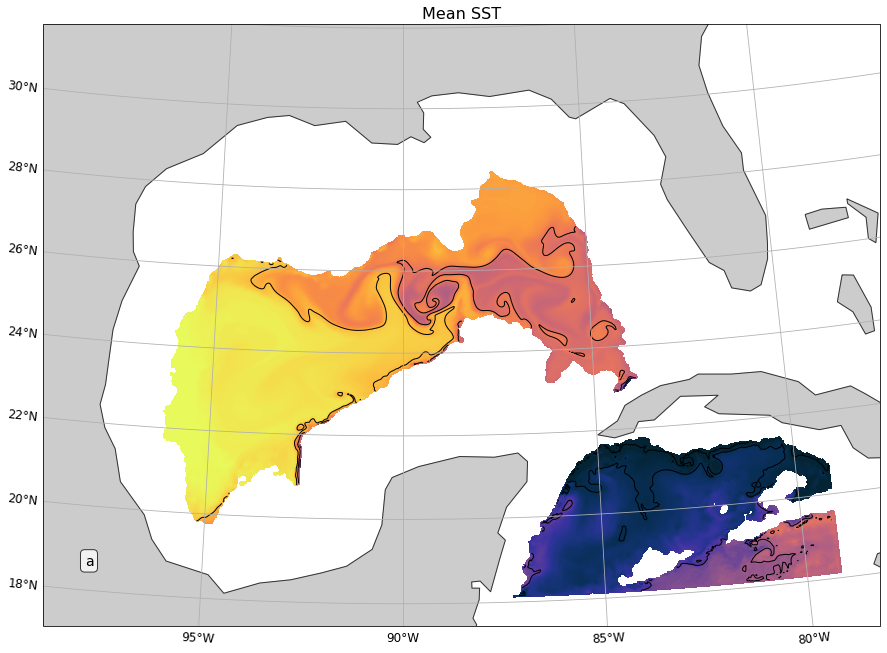

In [77]:

fig = plt.figure(figsize=(15,13))
# we will have 3 rows of plots and 3 columns of plots
nrows, ncols = 1, 1

titlesize = 16
ticksize = 12


#fig, axs =  plt.subplots(1, 1,figsize=(15,13))

ax1 = axs
## Mean SSTs ##
# set up subplot in location 1 (top left) with a projection since it is a map
ax1 = plt.subplot(nrows, ncols, 1, projection=proj)
# call the setup_map convenience function to get the basics into the map
# this returns a dictionary of items to input to your subsequent plotting calls
pargs, oargs = setup_map(ax=ax1,proj=proj, title='Mean SST', titlesize=titlesize, xticks=np.arange(-95,-75,5),
                            ticklabelsize=ticksize, subargs={'label': 'a', 'loc': 'bottom left'})


#SST=ds['temp'].cf.isel(Z=-1,ocean_time=0)
SST = xroms.isoslice(ds.temp.isel(ocean_time=0), [-2500], ds.temp.attrs['grid'])


SST.cmo.cfpcolormesh(**pargs)
# also plot contour lines on top. This is matplotlib wrapped by xarray with cf-xarray.
cs = SST.cf.plot.contour(**pargs, colors='k', linewidths=1)
# also label contour lines. This is matplotlib directly.
#ax1.clabel(cs, inline=1, fontsize=10, fmt='%d')  # add labels to contours

plt.savefig('test.png', bbox_inches='tight', pad_inches=1)
#plt.show()

In [64]:
SST=ds['temp'].cf.isel(Z=-1,ocean_time=0)
SST.name='new'
SST.attrs['long_name']='Sea Surface Temp'
SST.cmo

ds['temp']

In [63]:
SST.attrs['long_name']

'Sea Surface Temp'

In [78]:
#sst_slice = ds.temp.isoslice(-86, ds.temp.lon_rho, axis='X')
#temp_slice = xroms.isoslice(ds.temp.isel(ocean_time=0), np.linspace(0, -600, 2), ds.temp.attrs['grid'])
temp_slice = xroms.isoslice(ds.temp.isel(ocean_time=0), [-10], ds.temp.attrs['grid'])
temp_slice
#temp_slice.plot()
#sst_slice.plot()

<xarray.DataArray 'temp' (eta_rho: 489, xi_rho: 655)>
dask.array<copy, shape=(489, 655), dtype=float64, chunksize=(489, 655), chunktype=numpy.ndarray>
Coordinates:
    ocean_time  datetime64[ns] 2010-02-01T03:00:00
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 648 649 650 651 652 653 654
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 482 483 484 485 486 487 488
    z_rho       int64 -10
Attributes:
    long_name:  potential temperature
    units:      Celsius
    time:       ocean_time
    field:      temperature, scalar, series
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...

IndexError: tuple index out of range

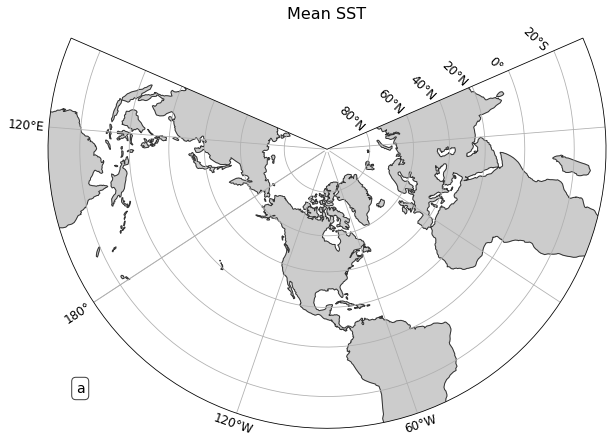

In [92]:
grid = ds.xroms.grid
lon0 = -86
varin = ds.temp


fig = plt.figure(figsize=(10,10))grid = ds.xroms.grid
lon0 = -86
varin = ds.temp


fig = plt.figure(figsize=(15,13))
# we will have 3 rows of plots and 3 columns of plots
nrows, ncols = 1, 1

titlesize = 16
ticksize = 12


## Mean SSTs ##
# set up subplot in location 1 (top left) with a projection since it is a map
ax1 = plt.subplot(nrows, ncols, 1, projection=proj)
# call the setup_map convenience function to get the basics into the map
# this returns a dictionary of items to input to your subsequent plotting calls
pargs, oargs = setup_map(ax=ax1,proj=proj, title='Mean SST', titlesize=titlesize,
                            ticklabelsize=ticksize, subargs={'label': 'a', 'loc': 'bottom left'})

aa=xroms.isoslice(varin, lon0, iso_array=varin.cf['longitude'], axis='X').mean('ocean_time')
# we will have 3 rows of plots and 3 columns of plots
nrows, ncols = 1, 1

titlesize = 16
ticksize = 12


## Mean SSTs ##
# set up subplot in location 1 (top left) with a projection since it is a map
ax1 = plt.subplot(nrows, ncols, 1, projection=proj)
# call the setup_map convenience function to get the basics into the map
# this returns a dictionary of items to input to your subsequent plotting calls
pargs, oargs = setup_map(ax=ax1,proj=proj, title='Mean SST', titlesize=titlesize,
                            ticklabelsize=ticksize, subargs={'label': 'a', 'loc': 'bottom left'})

aa=xroms.isoslice(varin, lon0, iso_array=varin.cf['longitude'], axis='X').mean('ocean_time')

#aa.cf.plot.pcolormesh()
aa.cmo.cfpcolormesh(**pargs)
# also plot contour lines on top. This is matplotlib wrapped by xarray with cf-xarray.
#cs = SST.cf.plot.contour(**pargs, colors='k', linewidths=1)



#aa.plot()

In [104]:
av_temp = ds['temp'].mean('ocean_time')
av_temp

<xarray.DataArray 'temp' (s_rho: 50, eta_rho: 489, xi_rho: 655)>
dask.array<mean_agg-aggregate, shape=(50, 489, 655), dtype=float32, chunksize=(50, 489, 655), chunktype=numpy.ndarray>
Coordinates:
  * s_rho    (s_rho) float64 -0.99 -0.97 -0.95 -0.93 ... -0.07 -0.05 -0.03 -0.01
    lon_rho  (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
    lat_rho  (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
  * xi_rho   (xi_rho) int64 0 1 2 3 4 5 6 7 ... 647 648 649 650 651 652 653 654
  * eta_rho  (eta_rho) int64 0 1 2 3 4 5 6 7 ... 481 482 483 484 485 486 487 488
    z_rho0   (s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(50, 489, 655), meta=np.ndarray>
Attributes:
    long_name:  potential temperature
    units:      Celsius
    time:       ocean_time
    field:      temperature, scalar, series
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...

In [106]:
grid = ds.xroms.grid
lon0 = np.linspace(-84, -92, 6) 
varin = av_temp

zon_slices = xroms.isoslice(varin, lon0, varin.attrs['grid'], iso_array=varin.cf['X'])#.mean('ocean_time')
zon_mean
zon_mean = zon_slices.mean('longitude')

ValueError: operand to apply_ufunc has required core dimensions ['s_rho'], but some of these dimensions are absent on an input variable: ['s_rho']

In [139]:
varin = ds['temp'].mean('ocean_time')
#varin.z_rho0.isel(xi_rho=0,eta_rho=0)
#varin
#zon_gridmean = varin.xroms.gridmean('X')  # this uses xgcm to properly calculate the horizontal grid metrics
# this is just to add in the latitudes afterward which I would think you'd want for plotting
# which value used in `isel(xi_rho=0)` isn't important since they all give the same latitudes
zon_gridmean['lat_rho'] = varin.lat_rho.isel(xi_rho=0).broadcast_like(zon_gridmean) 
zon_gridmean['z_rho0'] = varin.z_rho0.isel(xi_rho=0).broadcast_like(zon_gridmean) 
#zon_gridmean.plot()
#zon_gridmean

zon_gridmean.cf.describe()

#fig, ax = plt.subplots(1, 1, figsize=(15,10))
#zon_gridmean.cf.plot.pcolormesh(x='Y',y='Z')

#plt.show()
#zon_gridmean.cmo.cfpcolormesh(**pargs)
#

Axes:
	X: ['xi_rho']
	Y: ['eta_rho']
	Z: ['s_rho']
	T: []

Coordinates:
	longitude: ['lon_rho']
	latitude: ['lat_rho']
	vertical: []
	time: []

Cell Measures:
	area: []
	volume: []

Standard Names:
	unsupported



In [144]:
varin = ds['temp'].mean('ocean_time')
ds['zon_gridmean'] = varin.xroms.gridmean('X')  # this uses xgcm to properly calculate the horizontal grid metrics
# this is just to add in the latitudes afterward which I would think you'd want for plotting
# which value used in `isel(xi_rho=0)` isn't important since they all give the same latitudes
ds['zon_gridmean']['lat_rho'] = varin.lat_rho.isel(xi_rho=0).broadcast_like(ds['zon_gridmean']) 
#ds['zon_gridmean']['z_rho0'] = varin.z_rho0.isel(xi_rho=0).broadcast_like(ds['zon_gridmean']) 
#zon_gridmean.plot()
ds['zon_gridmean']


#fig = plt.figure(figsize=(15,13))
# we will have 3 rows of plots and 3 columns of plots
#nrows, ncols = 1, 1

#titlesize = 16
#ticksize = 12


## Mean SSTs ##
# set up subplot in location 1 (top left) with a projection since it is a map
#ax1 = plt.subplot(nrows, ncols, 1, projection=proj)
# call the setup_map convenience function to get the basics into the map
# this returns a dictionary of items to input to your subsequent plotting calls
#pargs, oargs = setup_map(ax=ax1,proj=proj, title='Mean SST', titlesize=titlesize,
#                            ticklabelsize=ticksize, subargs={'label': 'a', 'loc': 'bottom left'})

#ds['zon_gridmean'].cf.plot.pcolormesh(x='Y',y='Z')
#zon_gridmean.cmo.cfpcolormesh(**pargs)


<xarray.DataArray 'zon_gridmean' (s_rho: 50, eta_rho: 489)>
dask.array<truediv, shape=(50, 489), dtype=float64, chunksize=(50, 489), chunktype=numpy.ndarray>
Coordinates:
  * s_rho    (s_rho) float64 -0.99 -0.97 -0.95 -0.93 ... -0.07 -0.05 -0.03 -0.01
  * eta_rho  (eta_rho) int64 0 1 2 3 4 5 6 7 ... 481 482 483 484 485 486 487 488
Attributes:
    long_name:  potential temperature
    units:      Celsius
    time:       ocean_time
    field:      temperature, scalar, series
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...

In [145]:
ds['zon_gridmean'].cf.describe()


Axes:
	X: []
	Y: ['eta_rho']
	Z: ['s_rho']
	T: []

Coordinates:
	longitude: []
	latitude: []
	vertical: []
	time: []

Cell Measures:
	area: []
	volume: []

Standard Names:
	unsupported



In [120]:
ds['zon_gridmean']

<xarray.DataArray 'zon_gridmean' (s_rho: 50, eta_rho: 489)>
dask.array<truediv, shape=(50, 489), dtype=float64, chunksize=(50, 489), chunktype=numpy.ndarray>
Coordinates:
  * s_rho    (s_rho) float64 -0.99 -0.97 -0.95 -0.93 ... -0.07 -0.05 -0.03 -0.01
  * eta_rho  (eta_rho) int64 0 1 2 3 4 5 6 7 ... 481 482 483 484 485 486 487 488
Attributes:
    long_name:  potential temperature
    units:      Celsius
    time:       ocean_time
    field:      temperature, scalar, series
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...

In [148]:
varin = ds['temp'].mean('ocean_time')

# interpolate to constant depths
depths = np.linspace(-1, -1000, 50)
varout = varin.xroms.isoslice(depths, iso_array=varin.z_rho0)  # have to input iso_array because z_rho isn't present after time mean
# this is the attribute necessary for cf-xarray to recognize this coordinate as the "vertical" coordinates. This probably should be better 
# but needs to be fixed with cf-xarray
varout['z_rho0'].attrs["positive"] = "up" 

zon_gridmean = varout.xroms.gridmean('X')
zon_gridmean['lat_rho'] = varin.lat_rho.isel(xi_rho=0, drop=True).broadcast_like(zon_gridmean) 
zon_gridmean.cf.describe()

Axes:
	X: []
	Y: ['eta_rho']
	Z: ['z_rho0']
	T: []

Coordinates:
	longitude: ['lon_rho']
	latitude: ['lat_rho']
	vertical: ['z_rho0']
	time: []

Cell Measures:
	area: []
	volume: []

Standard Names:
	unsupported



/home/abishekg/anaconda3/envs/jupyterlab_env/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


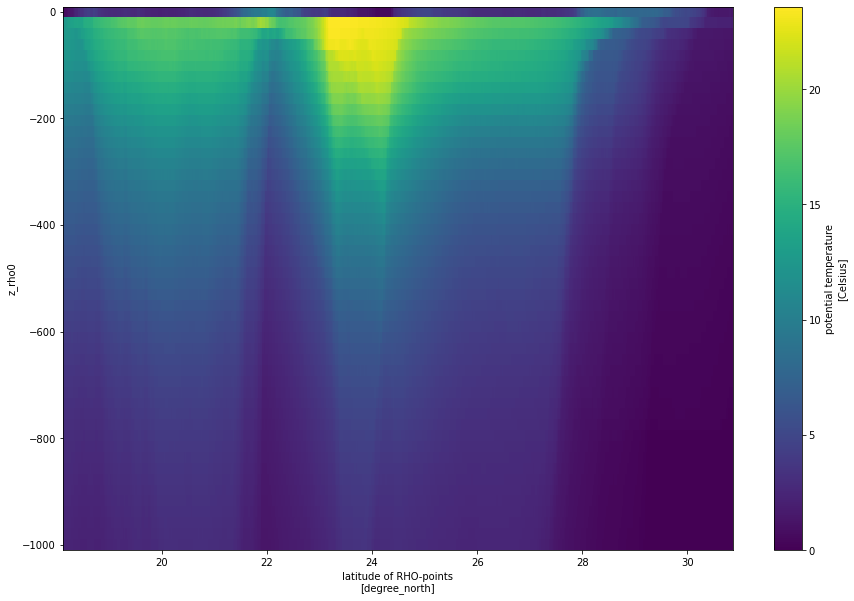

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
zon_gridmean.cf.plot.pcolormesh(x='latitude',y='vertical')

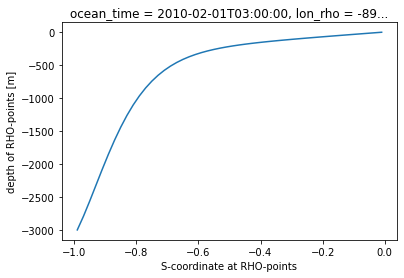

In [156]:
var = ds.z_rho.isel(ocean_time=0,xi_rho=300,eta_rho=300).compute()
var.plot()

In [157]:
target_values = np.linspace(-0.01, -0.99, 50)
transformed = ds.salt.interp(s_rho=target_values)
transformed=transformed.mean(['ocean_time'])
transformed.compute()

/home/abishekg/anaconda3/envs/jupyterlab_env/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'salt' (s_rho: 50, eta_rho: 489, xi_rho: 655)>
array([[[      nan,       nan,       nan, ..., 35.743202, 35.749992,
         35.750965],
        [      nan,       nan,       nan, ..., 35.744755, 35.750874,
         35.751934],
        [      nan,       nan,       nan, ..., 35.743164, 35.748974,
         35.747486],
        ...,
        [      nan,       nan,       nan, ..., 36.297585, 36.25362 ,
         36.37045 ],
        [      nan,       nan,       nan, ..., 36.207775, 36.10841 ,
         36.357395],
        [      nan,       nan,       nan, ..., 36.346615, 36.357185,
         36.35729 ]],

       [[      nan,       nan,       nan, ..., 35.743134, 35.74989 ,
         35.750984],
        [      nan,       nan,       nan, ..., 35.742943, 35.749115,
         35.75208 ],
        [      nan,       nan,       nan, ..., 35.741024, 35.74693 ,
         35.74721 ],
...
        [      nan,       nan,       nan, ..., 35.148754, 35.149494,
         35.134563],
        [      nan,       nan,       nan, ..., 35.146877, 35.145287,
         35.13525 ],
        [      nan,       nan,       nan, ..., 35.136772, 35.137745,
         35.136497]],

       [[      nan,       nan,       nan, ..., 35.025402, 35.027554,
         35.028652],
        [      nan,       nan,       nan, ..., 35.02573 , 35.02769 ,
         35.02975 ],
        [      nan,       nan,       nan, ..., 35.02659 , 35.028336,
         35.03023 ],
        ...,
        [      nan,       nan,       nan, ..., 35.12396 , 35.126232,
         35.11867 ],
        [      nan,       nan,       nan, ..., 35.128136, 35.130383,
         35.121025],
        [      nan,       nan,       nan, ..., 35.122746, 35.123524,
         35.122272]]], dtype=float32)
Coordinates:
    lon_rho  (eta_rho, xi_rho) float64 -97.94 -97.92 -97.89 ... -79.19 -79.16
    lat_rho  (eta_rho, xi_rho) float64 18.13 18.13 18.13 ... 30.85 30.85 30.85
  * xi_rho   (xi_rho) int64 0 1 2 3 4 5 6 7 ... 647 648 649 650 651 652 653 654
  * eta_rho  (eta_rho) int64 0 1 2 3 4 5 6 7 ... 481 482 483 484 485 486 487 488
    z_rho0   (s_rho, eta_rho, xi_rho) float64 -0.1446 -0.1446 ... -739.0 -743.1
  * s_rho    (s_rho) float64 -0.01 -0.03 -0.05 -0.07 ... -0.93 -0.95 -0.97 -0.99
Attributes:
    long_name:  salinity
    time:       ocean_time
    field:      salinity, scalar, series
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...

In [158]:
ds.salt

<xarray.DataArray 'salt' (ocean_time: 224, s_rho: 50, eta_rho: 489, xi_rho: 655)>
dask.array<concatenate, shape=(224, 50, 489, 655), dtype=float32, chunksize=(8, 50, 489, 655), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.99 -0.97 -0.95 -0.93 ... -0.05 -0.03 -0.01
  * ocean_time  (ocean_time) datetime64[ns] 2010-02-01T03:00:00 ... 2010-03-01
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(489, 655), meta=np.ndarray>
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 648 649 650 651 652 653 654
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 482 483 484 485 486 487 488
    z_rho       (ocean_time, s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(8, 50, 489, 655), meta=np.ndarray>
    z_rho0      (s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(50, 489, 655), meta=np.ndarray>
Attributes:
    long_name:  salinity
    time:       ocean_time
    field:      salinity, scalar, series
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...

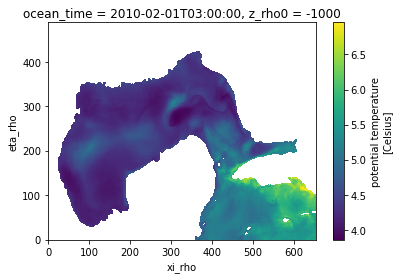

In [18]:
#varin = ds['temp'].mean('ocean_time')
varin = ds['temp'].isel(ocean_time=0)

# interpolate to constant depths
depths = [-1000]
varout = varin.xroms.isoslice(depths, iso_array=varin.z_rho0)  # have to input iso_array because z_rho isn't present after time mean
# this is the attribute necessary for cf-xarray to recognize this coordinate as the "vertical" coordinates. This probably should be better 
# but needs to be fixed with cf-xarray
#varout['z_rho0'].attrs["positive"] = "up" 
varout.plot()

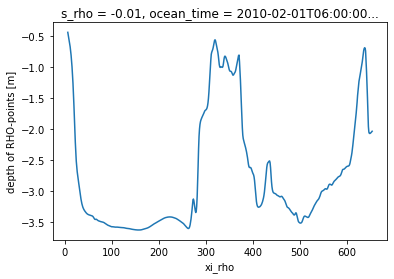

In [27]:
#var = ds['temp'].z_rho.isel(s_rho=48,eta_rho=200,xi_rho=300)
#var = ds['temp'].z_rho.isel(s_rho=20,eta_rho=200,xi_rho=300)
var = ds['temp'].z_rho.isel(ocean_time=1,s_rho=49,eta_rho=200)
var.plot()

/home/abishekg/anaconda3/envs/jupyterlab_env/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


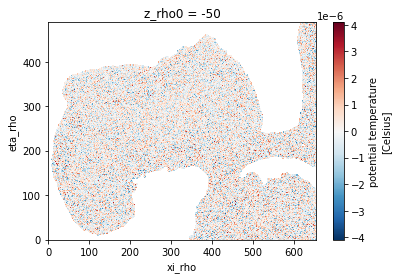

In [20]:
varin = ds['temp']

# interpolate to constant depths
depths = -50
var1 = varin.xroms.isoslice(depths, iso_array=varin.z_rho0) 
var1 = var1.mean('ocean_time')

varin2 = ds['temp'].mean('ocean_time')
var2 = varin2.xroms.isoslice(depths, iso_array=varin.z_rho0) 

var3 = var1-var2
var3.plot()

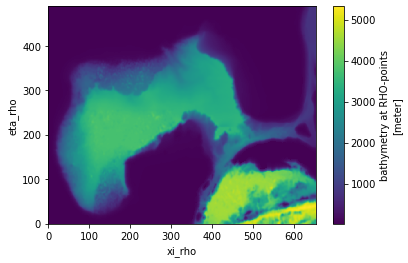

In [28]:
var = ds.h
var.plot()

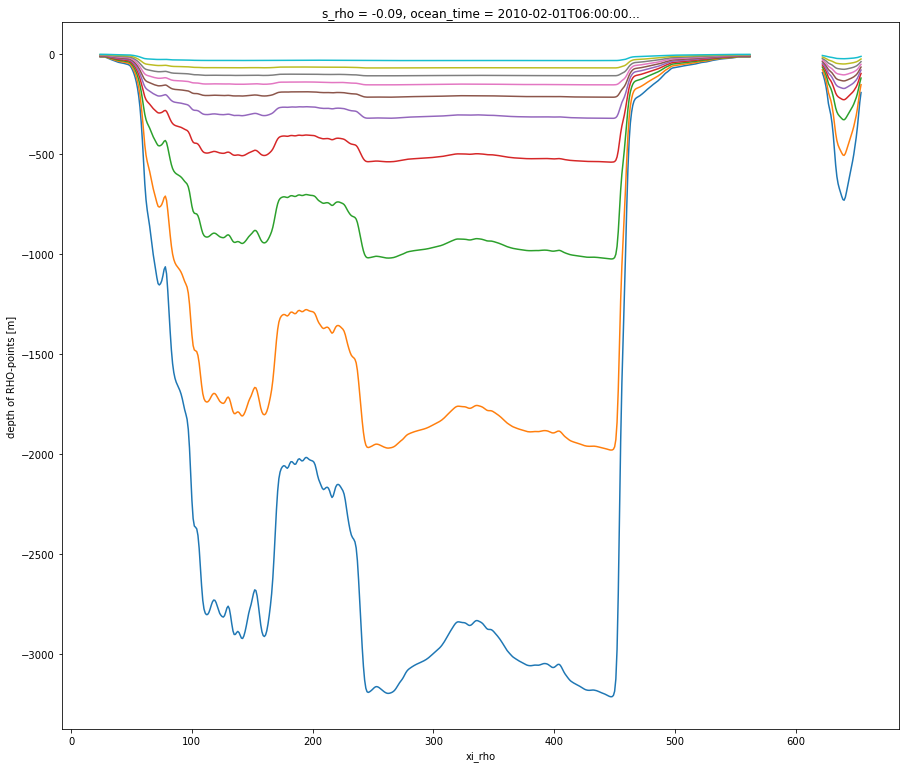

In [5]:
import xarray
fig = plt.figure(figsize=(15,13))
# we will have 3 rows of plots and 3 columns of plots
nrows, ncols = 1, 1
titlesize = 16
ticksize = 12
# set up subplot in location 1 (top left) with a projection since it is a map
ax1 = plt.subplot(nrows, ncols, 1)
# call the setup_map convenience function to get the basics into the map
# this returns a dictionary of items to input to your subsequent plotting calls
#pargs, oargs = setup_map(ax=ax1,proj=proj, title='Mean SST', titlesize=titlesize, xticks=np.arange(-95,-75,5),
#                            ticklabelsize=ticksize, subargs={'label': 'a', 'loc': 'bottom left'})

#for eta in [50,100,150,200,250,300,350,400,450]:
for s_rho in range(0,49,5):
    var = ds['temp'].z_rho.isel(ocean_time=1,s_rho=s_rho,eta_rho=300)
    xarray.plot.line(var,ax=ax1)
    #var.plot()

#SST.cmo.cfpcolormesh(**pargs)
# also plot contour lines on top. This is matplotlib wrapped by xarray with cf-xarray.
#cs = SST.cf.plot.contour(**pargs, colors='k', linewidths=1)
# also label contour lines. This is matplotlib directly.
#ax1.clabel(cs, inline=1, fontsize=10, fmt='%d')  # add labels to contours

#plt.savefig('test.png', bbox_inches='tight', pad_inches=1)
#plt.show()

In [38]:
ds.s_rho

<xarray.DataArray 's_rho' (s_rho: 50)>
array([-0.99, -0.97, -0.95, -0.93, -0.91, -0.89, -0.87, -0.85, -0.83, -0.81,
       -0.79, -0.77, -0.75, -0.73, -0.71, -0.69, -0.67, -0.65, -0.63, -0.61,
       -0.59, -0.57, -0.55, -0.53, -0.51, -0.49, -0.47, -0.45, -0.43, -0.41,
       -0.39, -0.37, -0.35, -0.33, -0.31, -0.29, -0.27, -0.25, -0.23, -0.21,
       -0.19, -0.17, -0.15, -0.13, -0.11, -0.09, -0.07, -0.05, -0.03, -0.01])
Coordinates:
  * s_rho    (s_rho) float64 -0.99 -0.97 -0.95 -0.93 ... -0.07 -0.05 -0.03 -0.01
Attributes:
    long_name:      S-coordinate at RHO-points
    valid_min:      -1.0
    valid_max:      0.0
    standard_name:  ocean_s_coordinate_g2
    formula_terms:  s: s_rho C: Cs_r eta: zeta depth: h depth_c: hc
    field:          s_rho, scalar
    axis:           Z